In [27]:
import pandas as pd

datos = pd.read_csv("lotohistorial-google.csv")


In [28]:
datos.head()

,fecha,dia-de-la-semana,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador
0,21/10/2023,sabado,4,27,23,36,13,1,500000,False
1,28/10/2023,sabado,19,30,12,8,3,17,533000,False
2,31/10/2023,martes,35,28,4,20,1,25,533000,False
3,4/11/2023,sabado,23,32,16,11,31,4,594131,False
4,7/11/2023,martes,9,3,18,11,33,27,594131,False


In [29]:
datos = datos.drop(columns=["fecha", "dia-de-la-semana"])

In [30]:
dummies_ganador = pd.get_dummies(data=datos["ganador"], columns="ganador", dtype=int, drop_first=True)
datos["ganador"] = dummies_ganador

In [31]:
# Media, desviación estándar y suma de las posiciones
datos['media_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].mean(axis=1)
datos['desviacion_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].std(axis=1)
datos['suma_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].sum(axis=1)

# # Frecuencia histórica de cada número
# frecuencia_historica = datos.loc[:, "posicion-1":"posicion-6"].stack().value_counts()
# frecuencia_dict = frecuencia_historica.to_dict()

# datos['frecuencia_historica'] = datos.loc[:, "posicion-1":"posicion-6"].apply(
#     lambda fila: sum(frecuencia_dict.get(numero, 0) for numero in fila), axis=1
# )

# Posición más alta y más baja
datos['posicion_mas_alta'] = datos.loc[:, "posicion-1":"posicion-6"].max(axis=1)
datos['posicion_mas_baja'] = datos.loc[:, "posicion-1":"posicion-6"].min(axis=1)

# Diferencia entre números consecutivos
for i in range(1, 6):  # Iterar de la primera posición a la penúltima
    datos[f'diferencia_posicion_{i}_{i+1}'] = datos[f'posicion-{i+1}'] - datos[f'posicion-{i}']

# Rango (número más alto menos el más bajo)
datos['rango_posiciones'] = datos['posicion_mas_alta'] - datos['posicion_mas_baja']

# Mediana de las posiciones
datos['mediana_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].median(axis=1)

# Número de ocurrencias (frecuencia relativa) de cada número dentro de cada combinación
# Este valor es la suma de frecuencias de cada número dividido entre el total de posiciones
# datos['frecuencia_media'] = datos.loc[:, "posicion-1":"posicion-6"].apply(
#     lambda fila: sum(frecuencia_dict.get(numero, 0) for numero in fila) / 6, axis=1
# )

# Posiciones pares vs impares
datos['suma_pares'] = datos.loc[:, ["posicion-1", "posicion-3", "posicion-5"]].sum(axis=1)
datos['suma_impares'] = datos.loc[:, ["posicion-2", "posicion-4", "posicion-6"]].sum(axis=1)
datos['diferencia_pares_impares'] = datos['suma_pares'] - datos['suma_impares']

In [32]:
datos.head()

,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador,media_posiciones,desviacion_posiciones,...,diferencia_posicion_1_2,diferencia_posicion_2_3,diferencia_posicion_3_4,diferencia_posicion_4_5,diferencia_posicion_5_6,rango_posiciones,mediana_posiciones,suma_pares,suma_impares,diferencia_pares_impares
0,4,27,23,36,13,1,500000,0,17.333333,13.691847,...,23,-4,13,-23,-12,35,18.0,40,64,-24
1,19,30,12,8,3,17,533000,0,14.833333,9.453394,...,11,-18,-4,-5,14,27,14.5,34,55,-21
2,35,28,4,20,1,25,533000,0,18.833333,13.585532,...,-7,-24,16,-19,24,34,22.5,40,73,-33
3,23,32,16,11,31,4,594131,0,19.500000,11.184811,...,9,-16,-5,20,-27,28,19.5,70,47,23
4,9,3,18,11,33,27,594131,0,16.833333,11.426577,...,-6,15,-7,22,-6,30,14.5,60,41,19


### Empezamos el entrenamiento

In [33]:
X = datos.drop(columns=["posicion-1"])
y = datos["posicion-1"]

In [34]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

resultados = []
for i in range(1, 20):
    modelo = DecisionTreeRegressor(max_depth=i)
    modelo.fit(X_ent, y_ent)
    prediccione = modelo.predict(X_pru)
    mse = root_mean_squared_error(y_pru, prediccione)
    print(f"Resultado para {i} arboles: {mse}")
    resultados.append(mse)

Resultado para 1 arboles: 8.5339022412122
Resultado para 2 arboles: 7.8273849996123905
Resultado para 3 arboles: 4.843663081128457
Resultado para 4 arboles: 5.170454932073567
Resultado para 5 arboles: 4.575378842757402
Resultado para 6 arboles: 3.7896514401823738
Resultado para 7 arboles: 4.2327455869779875
Resultado para 8 arboles: 4.373261559370382
Resultado para 9 arboles: 3.4183600139811467
Resultado para 10 arboles: 4.654746681256314
Resultado para 11 arboles: 4.315669125408017
Resultado para 12 arboles: 3.5118845842842465
Resultado para 13 arboles: 4.623310502226732
Resultado para 14 arboles: 4.712571838532897
Resultado para 15 arboles: 4.2130748865881795
Resultado para 16 arboles: 5.115336417740935
Resultado para 17 arboles: 4.2130748865881795
Resultado para 18 arboles: 3.984344362627307
Resultado para 19 arboles: 4.546060565661952


<Axes: >

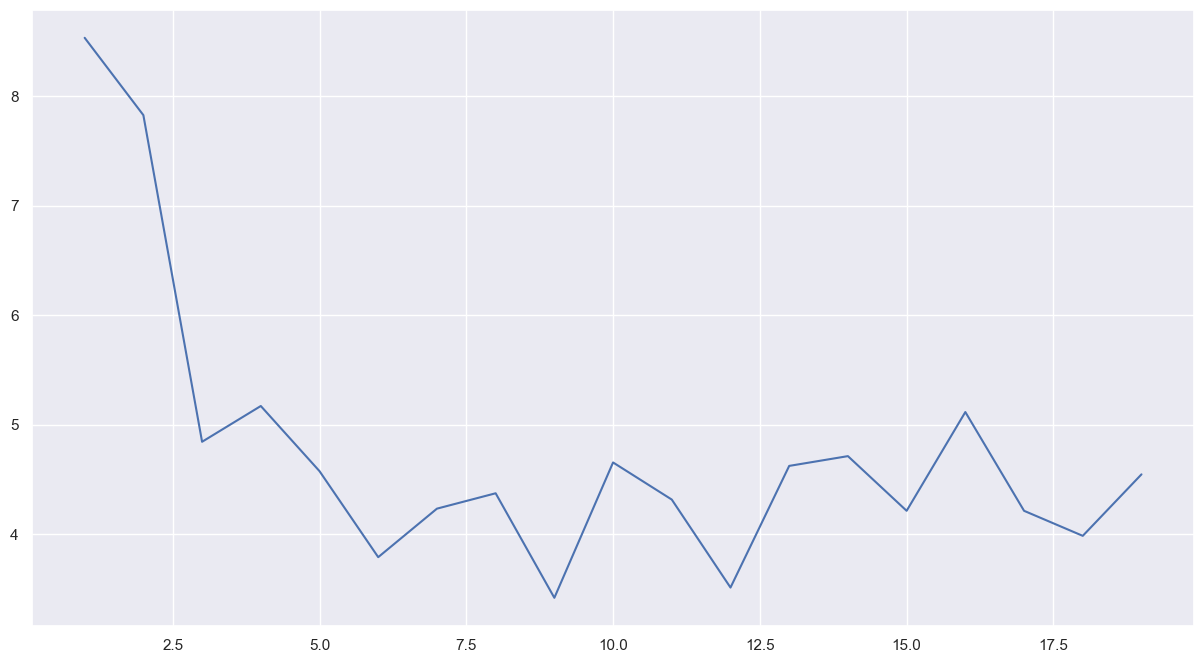

In [ ]:
import seaborn as sb
sb.lineplot( x=range(1, 20), y=resultados)

In [37]:
min(resultados)

3.4183600139811467

In [38]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=9)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [39]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

mse = root_mean_squared_error(y_pru, predicciones)
mae = mean_absolute_error(y_pru, predicciones)
r2 = r2_score(y_pru, predicciones)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 4.756331063454812
Mean Absolute Error (MAE): 3.763888888888889
R-squared: 0.8192569988672354


In [41]:
predicciones = modelo.predict(X_pru)
comparativa = { "Predicciones": predicciones, "Valores reales": y_pru}
pd.DataFrame(comparativa)

,Predicciones,Valores reales
67,30.000000,32
10,20.000000,30
65,7.000000,3
62,30.000000,30
81,2.000000,7
94,7.000000,8
102,28.000000,22
91,13.500000,5
92,32.000000,37
115,9.000000,13


In [42]:
print(modelo.score(X_ent, y_ent))
print(modelo.score(X_pru, y_pru))

0.9999025905582124
0.8192569988672354
